In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
comments = pd.read_csv("F:/YoutubeDataAnalysis/GBcomments.csv", error_bad_lines = False)


b'Skipping line 113225: expected 4 fields, saw 5\n'
b'Skipping line 158379: expected 4 fields, saw 7\nSkipping line 241590: expected 4 fields, saw 5\nSkipping line 245637: expected 4 fields, saw 7\n'
b'Skipping line 521402: expected 4 fields, saw 5\n'


In [3]:
comments.head()

,video_id,comment_text,likes,replies
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0


In [4]:
!pip install textblob

In [5]:
from textblob import TextBlob

In [6]:
TextBlob('Its more accurate to call it the M+ (1000) be...	').sentiment.polarity

0.45000000000000007

In [7]:
comments.isna().sum()

video_id         0
comment_text    28
likes            0
replies          0
dtype: int64

In [8]:
comments.dropna(inplace = True)

In [9]:
polarity = []

for i in comments["comment_text"]:
    polarity.append(TextBlob(i).sentiment.polarity)

In [10]:
polarity1 = [TextBlob(i).sentiment.polarity for i in comments["comment_text"]] #List Comprehension
comments["polarity1"] = polarity1
comments.head()

,video_id,comment_text,likes,replies,polarity1
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


In [10]:
comments["polarity"] = polarity
comments.head()

,video_id,comment_text,likes,replies,polarity
0,jt2OHQh0HoQ,It's more accurate to call it the M+ (1000) be...,0,0,0.45
1,jt2OHQh0HoQ,To be there with a samsung phone\n😂😂😂,1,0,0.00
2,jt2OHQh0HoQ,"Thank gosh, a place I can watch it without hav...",0,0,0.00
3,jt2OHQh0HoQ,What happened to the home button on the iPhone...,0,0,0.00
4,jt2OHQh0HoQ,Power is the disease. Care is the cure. Keep...,0,0,1.00


In [11]:
comments_positive = comments[comments["polarity"]==1]
comments_positive.shape

(20400, 5)

In [12]:
!pip install wordcloud

In [13]:
from wordcloud import WordCloud, STOPWORDS

In [14]:
stopword = set(STOPWORDS)

In [15]:
total_comments = ' '.join(comments_positive["comment_text"])
total_comments

"Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. The best thing to ever happen to iPhone Apple is always awesome \\n\\nhttps://youtu.be/rftzm6X1yP4 das a lot of edditing you have done there ... I like it :D Welcome to the Scandiworld! Power is the disease.\xa0 Care is the cure.\xa0 Keep caring for yourself and others as best as you can.\xa0 This is life. WHY DO I KEEP FREAKING LAUGHING EACH TIME I WATCH IT AGAIN ! even though I know how it will end. omg the best 😂 LIKE = MEET CELEBRITY \\nSUBSCRIBE = BECOME A BILLIONAIRE\\nSCROLL UP/DOWN = DEATH FOR YOU AND EVERYONE YOU LOVE!!!!!!!!!!!!!!!!!!!!!!!!!!!!! the sonic air timer was perfect no 16 on trending impressive My daughters name is lacey <3 I'm 17 and can proudly say Moon Dreamers was one of my favourite shows! if I could subscribe to Dude Perfect a million times I would You guys should make dude perfect sceets To be a dude perfect member it is so awesome .... 

In [16]:
wordcloud = WordCloud(width=1000,height=500,stopwords=stopword).generate(total_comments)

(-0.5, 999.5, 499.5, -0.5)

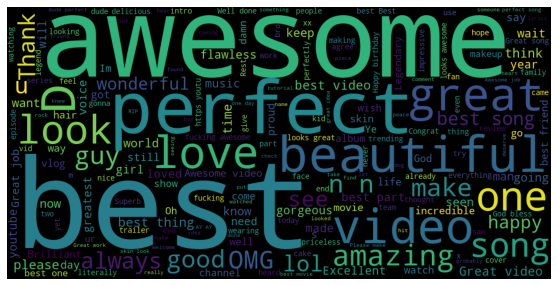

In [17]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloud)
plt.axis('off')


In [18]:
comments_negative = comments[comments["polarity"]==-1]

In [19]:
total_negcomments = ' '.join(comments_negative["comment_text"])

In [20]:
wordcloudneg = WordCloud(width=1000,height=500,stopwords=stopword).generate(total_negcomments)

(-0.5, 999.5, 499.5, -0.5)

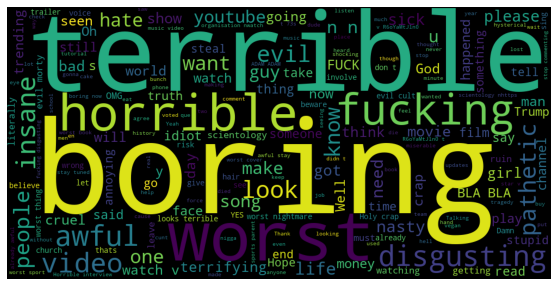

In [21]:
plt.figure(figsize=(15,5))
plt.imshow(wordcloudneg)
plt.axis('off')

In [23]:
comments["comment_text"][1]

'To be there with a samsung phone\\n😂😂😂'

In [25]:
print('\U0001F600') #Unicode character

😀


In [26]:
!pip install emoji

In [27]:
import emoji

In [28]:
len(comments)

718424

In [40]:
comment = comments["comment_text"][1]
comment

'To be there with a samsung phone\\n😂😂😂'

In [41]:
[c for c in comment if c in emoji.UNICODE_EMOJI] #List comprehension

[]

In [34]:
str = ''
for i in comments["comment_text"]:
    list = [c for c in i if c in emoji.UNICODE_EMOJI]
    for ele in list:
        str = str+ele

In [35]:
len(str)

0